# Bees problem for CCC

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(array([1182., 1053., 1002., 2220.]),
 array([0., 1., 2., 3., 4.]),
 <BarContainer object of 4 artists>)

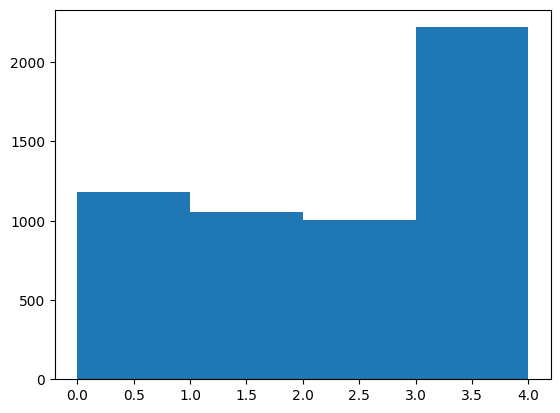

In [128]:
beesDB = pd.read_csv('./level_1/training_data.csv', header = None)
npBest = beesDB.values
# pandas to np array

plt.hist(npBest[:,1], bins=[0,1,2,3,4])

In [129]:
# Filter pandas where first column doesn't have 30 characters
beesFiltered = beesDB[beesDB.iloc[:,0].str.len() == 30]
beesFiltered.head()
beesFiltered.shape
# plt.hist(beesFiltered.iloc[:,1], bins=[0,1,2,3,4,5])
# beesDB.shape

(5275, 2)

In [130]:
# Level 3
bees01 = beesFiltered[beesFiltered.iloc[:,1].isin([0,1])]
bees01.rename(columns={bees01.columns[0]: "sequence"}, inplace=True)
bees01.rename(columns={bees01.columns[1]: "label"}, inplace=True)
bees01.head()


/tmp/ipykernel_483/3990970599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bees01.rename(columns={bees01.columns[0]: "sequence"}, inplace=True)
/tmp/ipykernel_483/3990970599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bees01.rename(columns={bees01.columns[1]: "label"}, inplace=True)


,sequence,label
2,agidfedadgcaaeieccabcdbahgcdeh,1
5,febcfhggcbgaaidbagbbdgbfdcccid,0
7,aidiicbbefghdcdhgccheebeehefcf,0
8,igihfghgdbfaahfbcdegheefdgidii,1
11,eifaidbagbeidhhgggiddcbcdfibhf,0


In [131]:
def convertStringToNpIntArray(string):
    return np.array([ord(x) - ord('a') for x in string])

In [132]:
# Change df sequences from string to np array of ints
bees01['sequence'] = bees01['sequence'].apply(convertStringToNpIntArray)

/tmp/ipykernel_483/4047299350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bees01['sequence'] = bees01['sequence'].apply(convertStringToNpIntArray)


In [133]:
bees01.head()

,sequence,label
2,"[0, 6, 8, 3, 5, 4, 3, 0, 3, 6, 2, 0, 0, 4, 8, ...",1
5,"[5, 4, 1, 2, 5, 7, 6, 6, 2, 1, 6, 0, 0, 8, 3, ...",0
7,"[0, 8, 3, 8, 8, 2, 1, 1, 4, 5, 6, 7, 3, 2, 3, ...",0
8,"[8, 6, 8, 7, 5, 6, 7, 6, 3, 1, 5, 0, 0, 7, 5, ...",1
11,"[4, 8, 5, 0, 8, 3, 1, 0, 6, 1, 4, 8, 3, 7, 7, ...",0


In [134]:
# Use kmeans on bees01
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
beesMatrix = bees01.iloc[:,0]
# Change beesMatrix to shape (n_samples, n_features)
beesMatrix = np.stack(beesMatrix.values)
beesAns01 = bees01.iloc[:,1]
# print(beesMatrix)
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=2000).fit(beesMatrix)


In [135]:
# Train KNN on beesMatrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(beesMatrix, beesAns01)

KNeighborsClassifier()

In [136]:
kmeans.labels_
# silhouette_score(beesMatrix, kmeans.labels_)
# Test kmeans on some data
testData = pd.read_csv('./level_3/simple_test_data.csv', header = None)
testData = testData.iloc[:,0].apply(convertStringToNpIntArray)
testData = np.stack(testData.values)



# kmeans.predict(testData)

# 0 = not a bee
# 1 = is a bee

In [137]:
# testData[0] = testData[0].apply(convertStringToNpIntArray)

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [138]:
beesAnsL3 = knn.predict(testData)

In [139]:
# convert to numpy array
beesMatrix = testData.iloc[:,0]
# Change beesMatrix to shape (n_samples, n_features)
beesMatrix = np.stack(beesMatrix.values)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
testData = beesMatrix
kmeans.predict(testData)
with open('beesAns3', 'w') as f:
    for item in beesAnsL3:
        f.write('0\n' if item == 0 else '1\n')

In [146]:
beesL4 = beesFiltered.iloc[:,0].apply(convertStringToNpIntArray)
beesL4 = np.stack(beesL4.values)
beesL4
beesAns04 = beesFiltered.iloc[:,1]


0       3
1       4
2       1
3       2
4       2
       ..
5452    4
5453    3
5454    1
5455    1
5456    2
Name: 1, Length: 5275, dtype: int64

In [147]:
knn.fit(beesL4, beesAns04)

KNeighborsClassifier()

In [148]:
# Reading full test data into np array
testData = pd.read_csv('./level_4/full_test_data.csv', header = None)
testData = testData.iloc[:,0].apply(convertStringToNpIntArray)
testData = np.stack(testData.values)

In [149]:
beesAnsL4 = knn.predict(testData)

In [150]:
with open('beesAns4', 'w') as f:
    for item in beesAnsL4:
        f.write(str(item) + "\n")

array([4, 0, 3, 4, 4, 2, 3, 1, 4, 3, 3, 2, 3, 3, 1, 1, 1, 2, 2, 0, 1, 0,
       3, 3, 2, 4, 3, 2, 2, 3, 4, 0, 3, 1, 3, 1, 1, 2, 3, 3, 0, 2, 3, 3,
       2, 3, 3, 3, 3, 2, 1, 1, 0, 0, 3, 1, 3, 3, 1, 3, 1, 2, 1, 4, 2, 1,
       2, 3, 1, 3, 3, 3, 3, 1, 1, 0, 3, 2, 3, 2, 0, 3, 1, 3, 2, 2, 3, 3,
       3, 1, 1, 2, 2, 3, 2, 1, 1, 3, 3, 2, 0, 2, 2, 2, 3, 3, 0, 3, 3, 1,
       2, 2, 1, 3, 1, 4, 1, 4, 0, 3, 2, 1, 3, 0, 0, 0, 1, 2, 3, 3, 3, 0,
       3, 1, 2, 1, 2, 1, 3, 0, 3, 3, 1, 2, 3, 1, 1, 2, 1, 3, 4, 3, 0, 1,
       3, 3, 2, 0, 3, 3, 3, 0, 1, 3, 4, 1, 3, 1, 3, 2, 1, 2, 3, 1, 3, 3,
       1, 2, 3, 3, 2, 3, 3, 4, 4, 3, 1, 0, 1, 1, 1, 3, 0, 3, 3, 1, 2, 4,
       3, 0, 0, 2, 2, 3, 2, 0, 0, 3, 3, 1, 2, 3, 3, 3, 3, 0, 1, 2, 2, 0,
       3, 2, 3, 4, 3, 3, 0, 3, 2, 3, 1, 0, 2, 2, 1, 1, 1, 2, 3, 1, 3, 4,
       3, 2, 0, 3, 2, 3, 0, 2, 4, 2, 1, 3, 2, 4, 1, 3, 3, 2, 0, 3, 0, 1,
       3, 3, 3, 3, 3, 4, 2, 4, 2, 2, 3, 1, 2, 2, 3, 1, 2, 3, 1, 0, 2, 3,
       0, 0, 3, 3, 3, 2, 0, 1, 1, 0, 2, 3, 0, 1, 0,